<IPython.core.display.Javascript object>


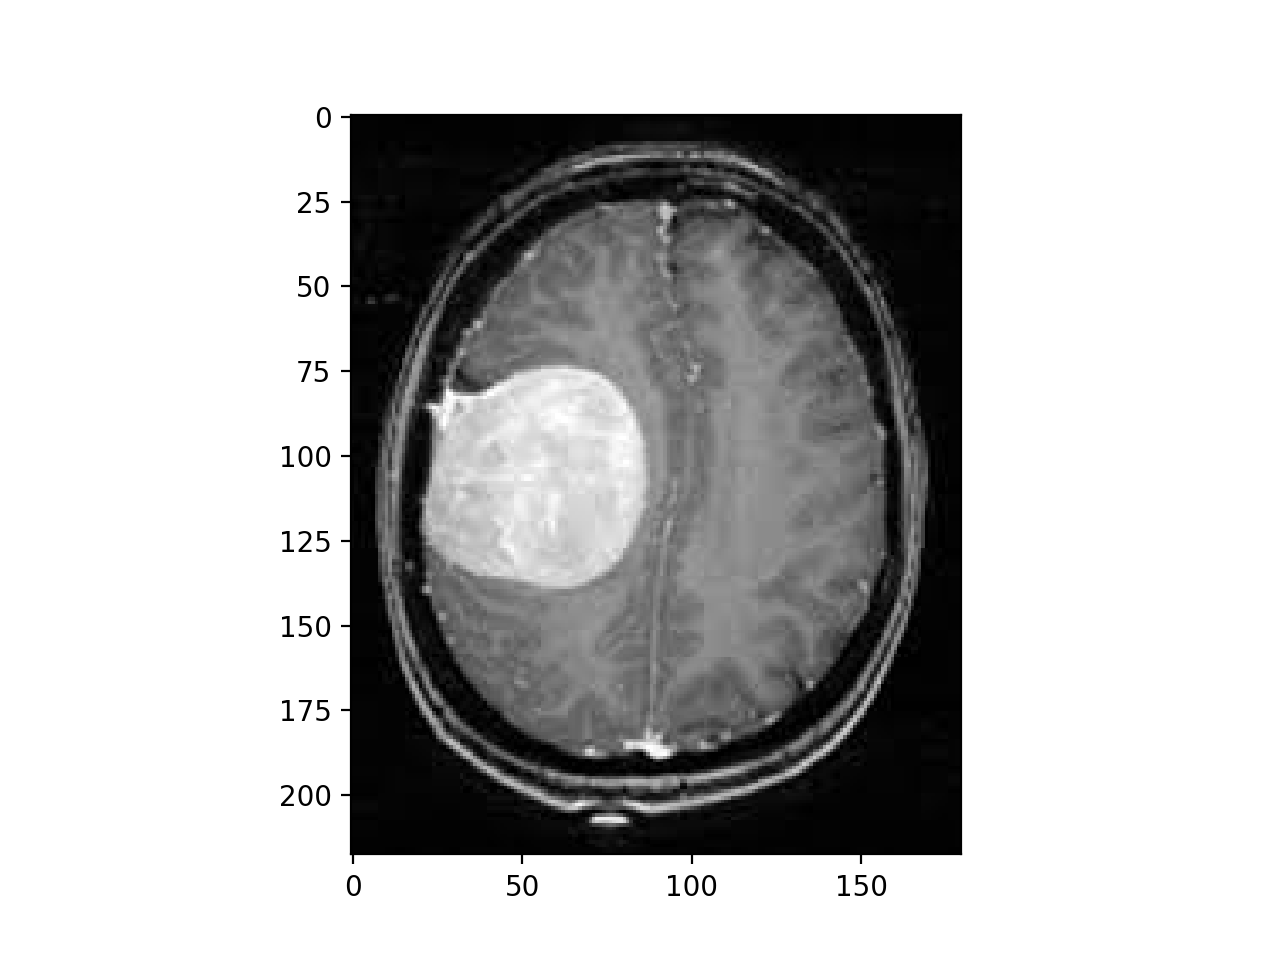

uint8
(218, 180, 3)


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from skimage.io import imread,imshow,imsave
%matplotlib notebook

im = imread('mri_brain.jpg')
plt.figure()
plt.imshow(im)
plt.show()
print(im.dtype)
print(im.shape)

(218, 180)


<IPython.core.display.Javascript object>


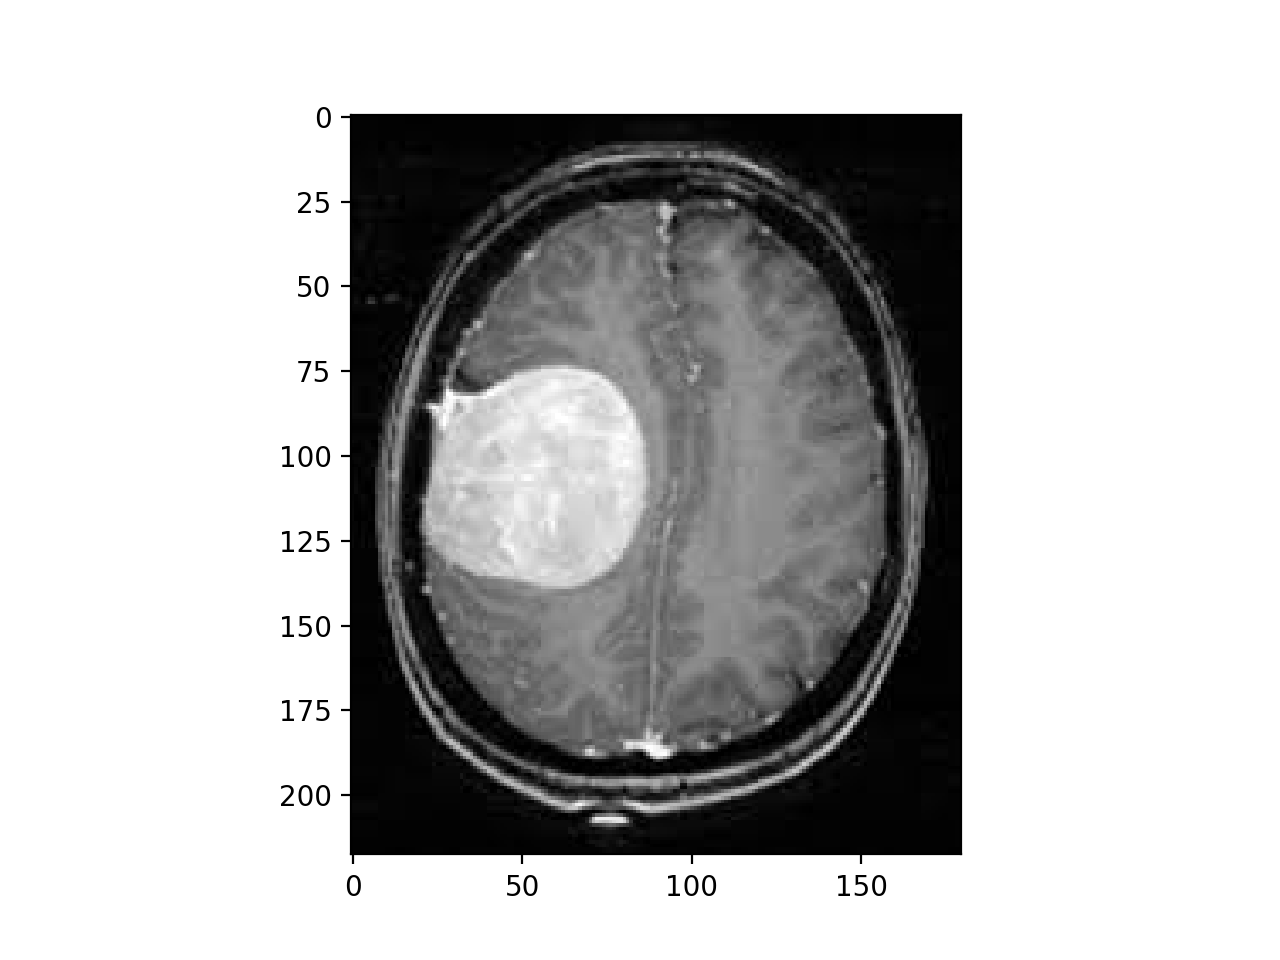

In [12]:
#From the previous analysis, we see that the image has three components that have all the
#same value. We convert thus it to an image with two components. 

from skimage.color import rgb2gray
imgray = rgb2gray(im)

print(imgray.shape)
plt.figure()
plt.imshow(imgray, cmap= plt.cm.gray)
plt.show()

<IPython.core.display.Javascript object>


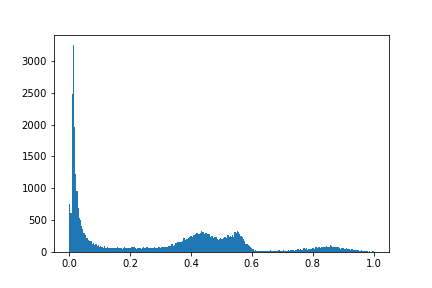

In [63]:
plt.figure()
plt.hist(imgray.flatten(), bins=256)
plt.show()

<IPython.core.display.Javascript object>


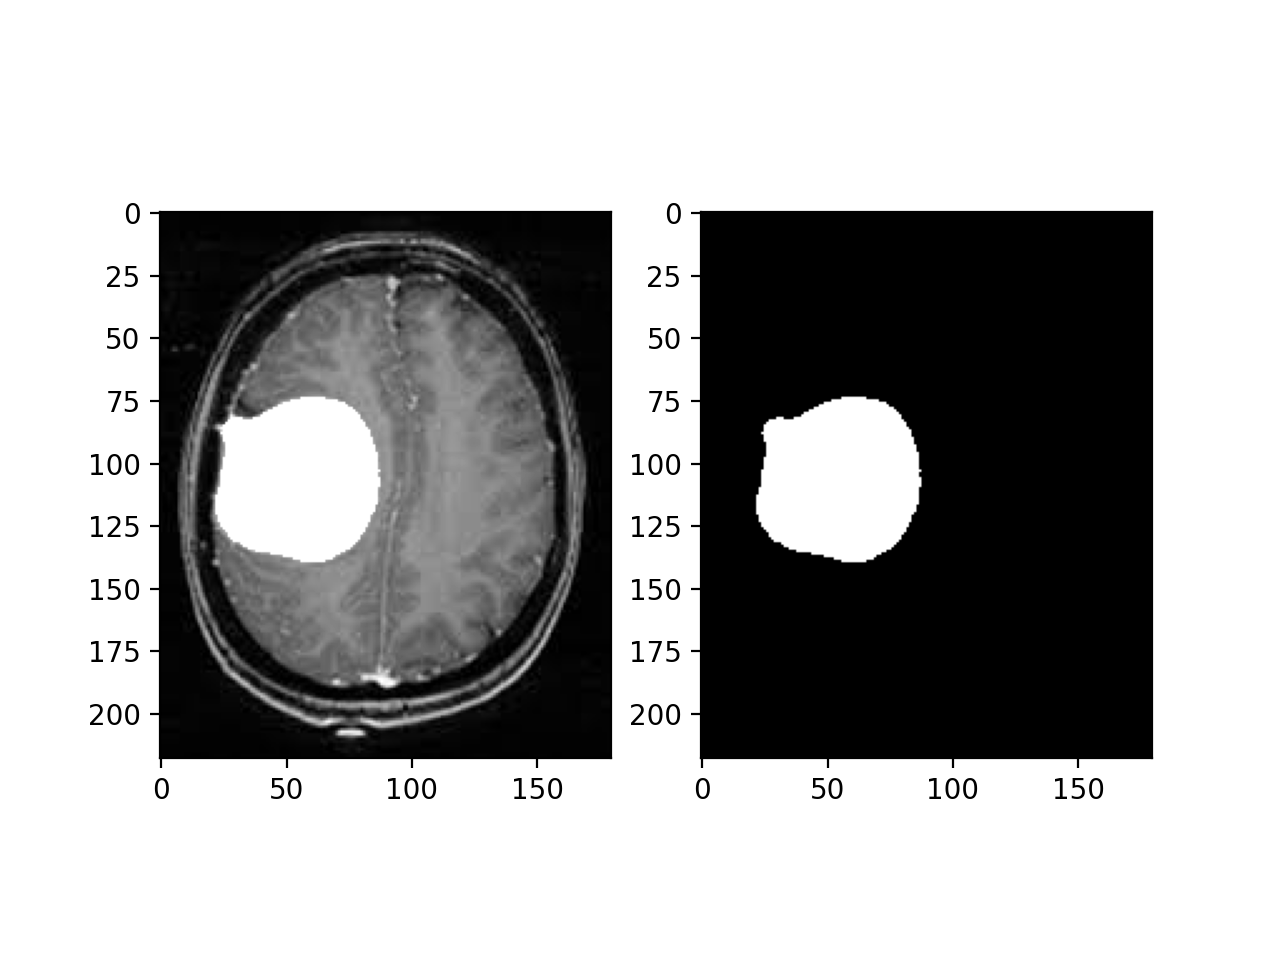

(218, 180)


In [21]:
#In the case of mri images, the values of the pixels have a meaning. Therefore,
#the use of a threshold to isolate the tumor is efficient and relevant as seen in the
#course.
#we can also use the watershed method to isolate the borders of the tumour, 
#then labelize the different shreds and select the one with a mean value corresponding to
#a tumour mri value. But, finally, it is also based on the value of the pixels and 
#the complexity of the algorithm increases for the same result.

from skimage.morphology import disk, opening, closing


mask = imgray>0.65  #threshold value to isolate the tumour
mask = opening(closing(mask, disk(5)), disk(5))  #fill in the gaps and remove
                                                 #isolated remaining points

im2 = np.zeros((imgray.shape))
im_sup = imgray.copy()
im2[mask==True] = 1
imgray[mask == True] = 1  #superposition on the image => we can see that all
                          #the tumour is selected

plt.figure()
plt.subplot(1,2,1)
plt.imshow(imgray, cmap= plt.cm.gray)
plt.subplot(1,2,2)
plt.imshow(im2, cmap= plt.cm.gray)
plt.show()
print(imgray.shape)

In [25]:
#calculation of the number of pixels of the tumour according to the x and y axis
n_y = 0
for y in range(imgray.shape[0]):   #run all the y
    for x in range(imgray.shape[1]):  #for every y value, if one of the x values gives
                                      #a white pixel => break and n_y+1
        if (imgray[y,x] == 1):
            n_y +=1
            break
print("nombre de pixels blanc selon l'axe y = ", n_y)

n_x = 0
for x in range(imgray.shape[1]):    #symmetry for the x
    for y in range(imgray.shape[0]):
        if (imgray[y,x] == 1):
            n_x +=1
            break
print("nombre de pixels blanc selon l'axe x = ", n_x)

nombre de pixels blanc selon l'axe y =  68
nombre de pixels blanc selon l'axe x =  67


In [66]:
#calculation of the area

area = (n_x*0.115)*(n_y*0.115)   #scale = 0.115cm/px
print("l'aire de la tumeur en cmxcm = ",area)

l'aire de la tumeur en cmxcm =  60.2531
